In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,scale
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve  
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc, recall_score, precision_score
from sklearn import metrics

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

import seaborn as sns
import math

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
heart= pd.read_csv('Heart2.csv')
print(heart.head(2))

   Gender  Age  Chest pain  Shortness of breath  Fatigue  Systolic  Diastolic  \
0  Female   55           1                    1        1       140         90   
1    Male   57           1                    1        1       150         80   

   Heart rate (bpm)  Lung sounds  Cholesterol level (mg/dL)  ...  \
0               100            1                        220  ...   
1               110            1                        210  ...   

                                          Cardiac CT  Obesity  Murmur  \
0  Shows a 50% blockage in the left anterior desc...        0       1   
1  Shows a 60% blockage in the right coronary artery        0       1   

   Chest x-ray  Previous illnesses  Pulmonary function tests  Spirometry  \
0         None                None                      None        None   
1         None                None                      None        None   

   Heart Disease                        Medications  \
0              1  Aspirin, metoprolol, atorvast

In [5]:
heart_new =  heart.drop(['Gender','Echocardiogram','Blood culture','EKG','Cardiac CT','Chest x-ray','Previous illnesses','Pulmonary function tests','Spirometry','Medications','Treatment'],axis=1)
label =  heart_new['Heart Disease']
data =  heart_new.drop('Heart Disease',axis=1)
data.shape


(334, 36)

In [6]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(data)
data =  standardScaler.transform(data)


from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(data,label,random_state=3)
train_X.shape

(250, 36)

# build model using default parameters

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(train_X,train_y)
log_pred_y = log_reg.predict(test_X)
log_reg.score(train_X,train_y)
log_reg.score(test_X,test_y)
from sklearn.metrics import accuracy_score
accuracy_score(test_y,log_pred_y)

0.4523809523809524

# Use grid search to find better parameters

C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Chia chien Li\anaconda3\lib\

C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Chia chien Li\anaconda3\lib\

C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Chia chien Li\anaconda3\lib\

C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Chia chien Li\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Chia chien Li\anaconda3\lib\

              precision    recall  f1-score   support

           0       0.54      0.93      0.68        46
           1       0.25      0.03      0.05        38

    accuracy                           0.52        84
   macro avg       0.39      0.48      0.37        84
weighted avg       0.41      0.52      0.40        84



<AxesSubplot:>

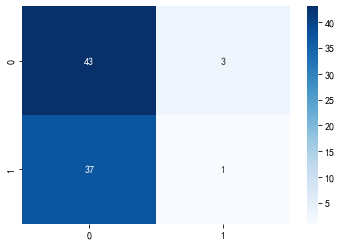

In [14]:
from sklearn.model_selection import GridSearchCV
param_test =  {'penalty':['l2','l1'],
                'C':[0.01,0.1,1.0,10,100],
                'class_weight':[None,'balanced']}
log_gv =  GridSearchCV(estimator=log_reg,param_grid=param_test,cv=5)
log_gv.fit(train_X,train_y)


log_gv.best_params_


log_gv.score(train_X,train_y)


log_gv.score(test_X,test_y)


log_pred_y =  log_gv.predict(test_X)


from sklearn.metrics import classification_report

print(classification_report(test_y,log_pred_y))
from sklearn.metrics import confusion_matrix





cm = confusion_matrix(test_y, log_pred_y)


sns.heatmap(cm, annot=True, cmap='Blues')

# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier()

#训练数据
knn.fit(train_X,train_y)

# 预测数据
knn_pred_y = knn.predict(test_X)

# 评估模型
print(knn.score(train_X,train_y))

print(knn.score(test_X,test_y))

print(accuracy_score(test_y,knn_pred_y))

0.684
0.5833333333333334
0.5833333333333334


In [19]:
from sklearn.model_selection import GridSearchCV
knn =  KNeighborsClassifier()
param_test =  [
    {'n_neighbors':[i for i in range(1,31)],
    'weights':['uniform']},

    {'n_neighbors':[i for i in range(1,21)],
    'weights':['distance'],
    'p':[i for i in range(1,6)]}
]
knn_gv = GridSearchCV(estimator = knn,param_grid=param_test,cv=5)
print(knn_gv.fit(train_X,train_y))
print(knn_gv.best_params_)

knn_pred_y = knn_gv.predict(test_X)
print(classification_report(test_y,knn_pred_y))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])
{'n_neighbors': 22, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.55      0.89      0.68        46
           1       0.44      0.11      0.17        38

    accuracy                           0.54        84
   macro avg       0.50      0.50      0.42        84
weighted avg       0.50      0.54      0.45        84



<AxesSubplot:>

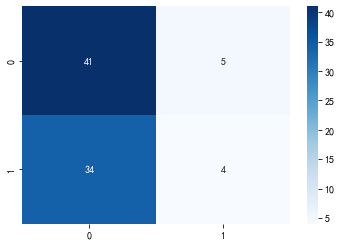

In [21]:
cm2 = confusion_matrix(test_y, knn_pred_y)


sns.heatmap(cm2, annot=True, cmap='Blues')

# random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_clf =  RandomForestClassifier(oob_score=True)


rf_clf.fit(train_X,train_y)


pred_rf =  rf_clf.predict(test_X)


print(rf_clf.score(train_X, train_y))

print(rf_clf.score(test_X,test_y))

print(accuracy_score(test_y,pred_rf))

print(rf_clf.oob_score_)




0.968
0.5357142857142857
0.5357142857142857
0.508


In [25]:
param_test={
        'n_estimators':[100,300,500],
        'max_leaf_nodes':[10,12,14,16]
}

rf_gv =  GridSearchCV(estimator=rf_clf,param_grid=param_test,cv=5)
rf_gv.fit(train_X,train_y)


print(rf_gv.best_params_)



pred_rf =  rf_gv.predict(test_X)

print(rf_gv.score(test_X,test_y))


0.5357142857142857

<AxesSubplot:>

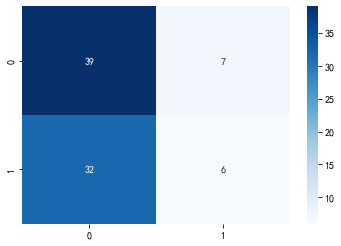

In [27]:
cm3 = confusion_matrix(test_y, pred_rf)


sns.heatmap(cm3, annot=True, cmap='Blues')